# Texture Analysis

## Statistical Approach

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops

In [2]:
texture_gray = cv2.imread("images/Texture.png", 0)
texture_gray.shape

(256, 256)

### Calculate the cooccurrence matrix of the image with distance 50 and angle 90 deg
(Feature Extraction of Images using GLCM (Gray Level Cooccurrence Matrix)). Extract features like:
- Contrast
- Dissimilarity
- Homogenity
- Energy
- Correlation

In [3]:
# Generate GLCM
distances = [50]
angles = [np.pi/2]
glcm = graycomatrix(texture_gray, distances=distances, angles=angles, levels=texture_gray.max()+1)

# Calculate Features from GLCM
contrast = graycoprops(glcm, 'contrast')
dissimilarity = graycoprops(glcm, 'dissimilarity')
homogeneity = graycoprops(glcm, 'homogeneity')
energy = graycoprops(glcm, 'energy')
correlation = graycoprops(glcm, 'correlation')

print("Texture caracteristics are:")
print(f"-> Contrast: {contrast}")
print(f"-> Dissimilarity: {dissimilarity}")
print(f"-> Homogenity: {homogeneity}")
print(f"-> Energy: {energy}")
print(f"-> Correlation: {correlation}")


Texture caracteristics are:
-> Contrast: [[8868.72870525]]
-> Dissimilarity: [[68.11402078]]
-> Homogenity: [[0.11990218]]
-> Energy: [[0.10592583]]
-> Correlation: [[0.27845453]]


### Calculate Local Binary Patterns (LBP)
[ref](https://www.geeksforgeeks.org/create-local-binary-pattern-of-an-image-using-opencv-python/)

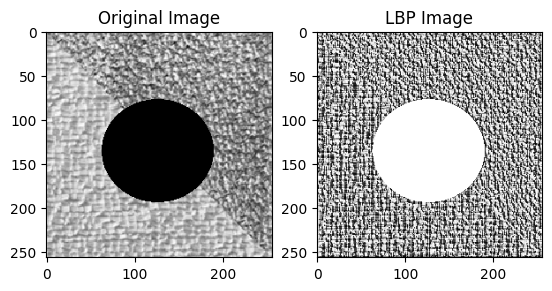

In [4]:
def get_pixel(img, center, x, y):
  new_value = 0
  try:
    # If local neighbourhood pixel  
    # value is greater than or equal 
    # to center pixel values then  
    # set it to 1 
    
    if img[x][y] >= center:
      new_value = 1
  
  except:
    # Exception is required when  
    # neighbourhood value of a center 
    # pixel value is null i.e. values 
    # present at boundaries. 
    pass
  
  return new_value

def lbp_calculated_pixel(img, x, y, matrix_dim=3):
  center = img[x][y]
  val_ar = []
  # top_left 
  val_ar.append(get_pixel(img, center, x-1, y-1))   
  # top 
  val_ar.append(get_pixel(img, center, x-1, y))  
  # top_right 
  val_ar.append(get_pixel(img, center, x-1, y + 1))  
  # right 
  val_ar.append(get_pixel(img, center, x, y + 1))  
  # bottom_right 
  val_ar.append(get_pixel(img, center, x + 1, y + 1))   
  # bottom 
  val_ar.append(get_pixel(img, center, x + 1, y)) 
  # bottom_left 
  val_ar.append(get_pixel(img, center, x + 1, y-1)) 
  # left 
  val_ar.append(get_pixel(img, center, x, y-1)) 
  # Now, we need to convert binary 
  # values to decimal 
  power_val = [2 ** i for i in range(matrix_dim**2 - 1)]
  val = 0
  
  for i in range(len(val_ar)):
    val += val_ar[i] * power_val[i]
  
  return val

img_bgr = cv2.imread("images/Texture.png")
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
image_lbp = np.zeros((img_gray.shape), dtype=np.uint8)
height, width, _ = img_bgr.shape
for i in range(height):
  for j in range(width):
    image_lbp[i][j] = lbp_calculated_pixel(img_gray, i, j)

plt.subplot(1, 2, 1)
plt.imshow(img_bgr)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(image_lbp, cmap='gray')
plt.title("LBP Image")
plt.show()

### Segment image using K-means
(**Still not sure this is working**)

[ref](https://medium.com/towardssingularity/k-means-clustering-for-image-segmentation-using-opencv-in-python-17178ce3d6f3)

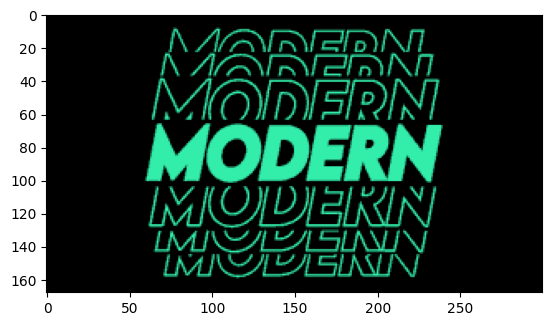

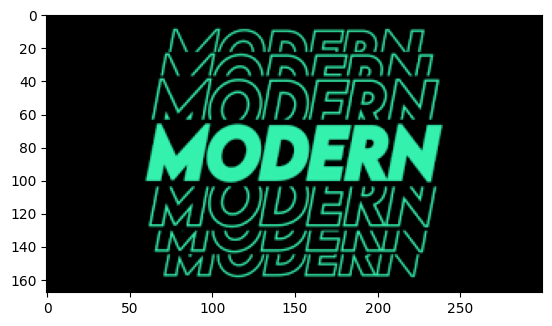

In [15]:
image = cv2.imread("images/text-image.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_vals = image.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)

#criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 80, 0.85) 
# Choosing number of cluster
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)

segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)
plt.show()
plt.imshow(image, cmap='gray')
